# Measure the difference between model bones and real bones

In [1]:
import sys
from os import path
sys.path.append("/home/diego/code/olveczky/dm/stac")
import rodent_environments
import util
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load Params
param_path = "/home/diego/code/olveczky/dm/stac/params/baseParams.yaml"
params = util.load_params(param_path)

# Build the rodent model
n_frames = 100
kp_data = np.zeros((n_frames, 60))
params['n_frames'] = n_frames
env = rodent_environments.rodent_mocap(kp_data, params)

# Save measured data (mm) and the bone-site pairs they correspond to 
bone_lengths = {'humerus': 30.0,
                'radius': 29.6,
                'femur': 36.5,
                'tibia': 42.8,
                'metatarsal': 23.4}
joint_pairs = {'humerus': ['shoulder_L', 'elbow_L'],
               'radius': ['elbow_L', 'wrist_L'],
               'femur': ['hip_L', 'knee_L'],
               'tibia': ['knee_L', 'ankle_L'],
               'metatarsal': ['ankle_L', 'toe_L']}

## Define functions to measure bone distances and length ratios

In [3]:
def get_bone_distance(physics, joint_pair):
    joint0 = physics.named.data.site_xpos['walker/' + joint_pair[0]].copy()
    joint1 = physics.named.data.site_xpos['walker/' + joint_pair[1]].copy()
    length = np.sqrt(np.sum((joint0 - joint1)**2))
    return length

def get_bone_ratios(bone_dict):
    n_bones = len(bone_dict.keys())
    ratio_mat = np.zeros((n_bones,n_bones))
    ratio_dict = {}
    for i, (bone0, length0) in enumerate(bone_dict.items()):
        for j, (bone1, length1) in enumerate(bone_dict.items()):
            ratio = length0/length1
            ratio_mat[i, j] = ratio
            ratio_dict[bone0 + '-' + bone1] = ratio
            
    return ratio_dict, ratio_mat

In [9]:
model_lengths = {k: get_bone_distance(env.physics, jp)*1000 for k, jp in joint_pairs.items()}
length_difference = {k: bone_lengths[k] - model_lengths[k] for k in model_lengths.keys()}
bone_ratios, bone_ratio_mat = get_bone_ratios(bone_lengths)
model_ratios, model_ratio_mat = get_bone_ratios(model_lengths)
print(model_lengths)
print(bone_lengths)
ratio = [bone_lengths[k]/model_lengths[k] for k in model_lengths.keys()]
print(np.mean(ratio))

{'humerus': 36.78314831549905, 'radius': 35.4400902933387, 'femur': 48.40439540471056, 'tibia': 52.378014851966284, 'metatarsal': 26.59869915701915}
{'humerus': 30.0, 'radius': 29.6, 'femur': 36.5, 'tibia': 42.8, 'metatarsal': 23.4}
0.8203491895254246


# Plot absolute lengths for the model and bones

Length_difference (mm):  {'humerus': -6.783148315499048, 'radius': -5.840090293338697, 'femur': -11.904395404710563, 'tibia': -9.578014851966287, 'metatarsal': -3.1986991570191528}


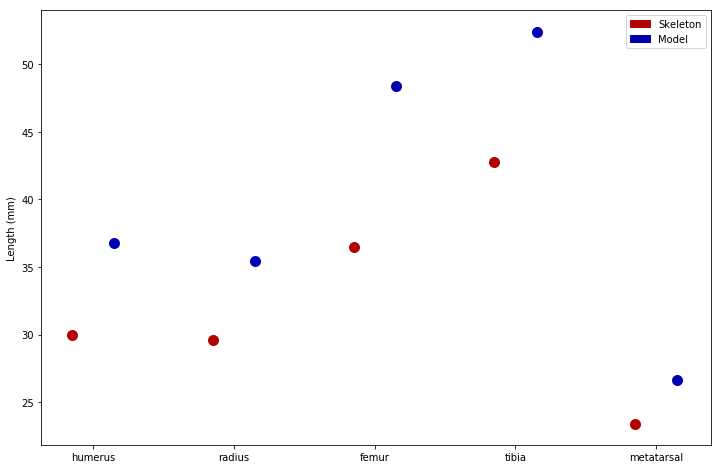

In [5]:
plt.subplots(figsize=(12,8))
for i, (k, v) in enumerate(bone_lengths.items()):
    plt.scatter(i-.15, v, color=[.7, 0, 0], linewidth=5)
for i, (k, v) in enumerate(model_lengths.items()):
    plt.scatter(i+.15, v, color=[0, 0, .7], linewidth=5)
plt.ylabel('Length (mm)')
p = plt.xticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
red_patch = matplotlib.patches.Patch(color=[.7, 0, 0], label='Skeleton')
blue_patch = matplotlib.patches.Patch(color=[0, 0, .7], label='Model')
l = plt.legend(handles=[red_patch, blue_patch])
print("Length_difference (mm): ", length_difference)

# Plot the ratios of different bones in the model and skeleton

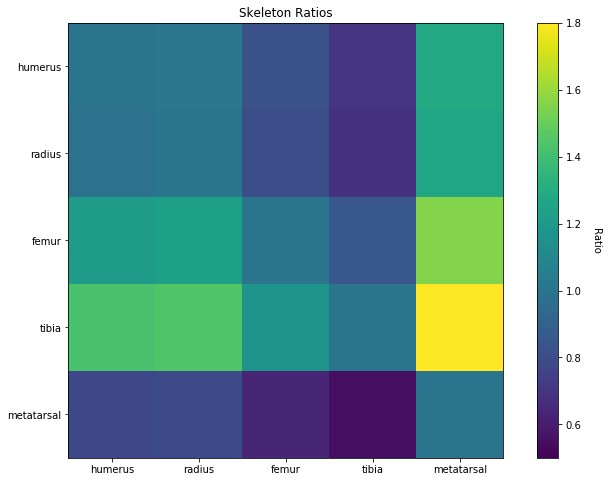

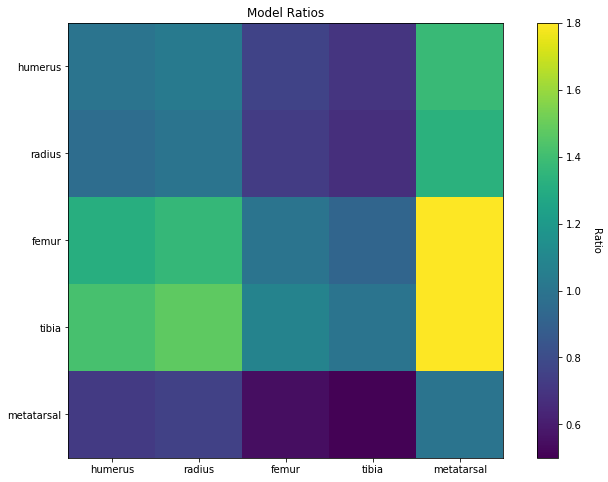

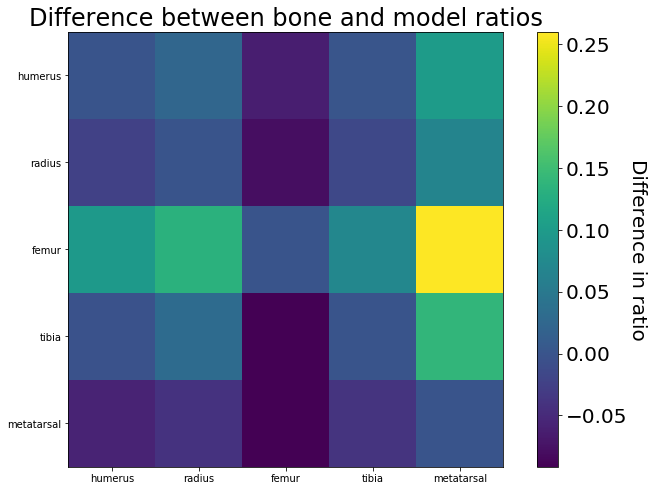

In [6]:
vmin = .5
vmax = 1.8

plt.subplots(figsize=(12,8))
plt.imshow(bone_ratio_mat, vmin=vmin, vmax=vmax)
cbar = plt.colorbar()
cbar.set_label('Ratio', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
plt.xticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
plt.yticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
plt.title('Skeleton Ratios')


plt.subplots(figsize=(12,8))
plt.imshow(model_ratio_mat, vmin=vmin, vmax=vmax)
cbar = plt.colorbar()
cbar.set_label('Ratio', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
plt.xticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
plt.yticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
plt.title('Model Ratios')

plt.subplots(figsize=(12,8))
plt.rcParams['font.size'] = 20
plt.imshow(model_ratio_mat - bone_ratio_mat)
cbar = plt.colorbar()
cbar.set_label('Difference in ratio', rotation=270)
cbar.ax.get_yaxis().labelpad = 20
p = plt.xticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
p = plt.yticks(ticks=np.arange(len(bone_lengths.keys())), labels=bone_lengths.keys())
t = plt.title('Difference between bone and model ratios')